In [1]:
# import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objects as go

In [2]:
life_exp_lib_democ = pd.read_csv("data/life-expectancy-vs-liberal-democracy-index.csv")

In [3]:
life_exp_lib_democ.tail(74)

,Entity,Code,Year,Period life expectancy at birth - Sex: all - Age: 0,"Liberal democracy index (best estimate, aggregate: average)",Population (historical),Continent
62512,Zimbabwe,ZWE,1826,NaN,NaN,984868.0,NaN
62513,Zimbabwe,ZWE,1827,NaN,NaN,968938.0,NaN
62514,Zimbabwe,ZWE,1828,NaN,NaN,953265.0,NaN
62515,Zimbabwe,ZWE,1829,NaN,NaN,937846.0,NaN
62516,Zimbabwe,ZWE,1830,NaN,NaN,922676.0,NaN
...,...,...,...,...,...,...,...
62581,Zimbabwe,ZWE,1895,NaN,NaN,1052230.0,NaN
62582,Zimbabwe,ZWE,1896,NaN,NaN,1062987.0,NaN
62583,Zimbabwe,ZWE,1897,NaN,NaN,1073853.0,NaN
62584,Zimbabwe,ZWE,1898,NaN,NaN,1084831.0,NaN


In [4]:
life_exp_lib_democ.shape

(62586, 7)

In [5]:
str(life_exp_lib_democ)

'            Entity      Code  Year  \\\n0         Abkhazia  OWID_ABK  2015   \n1      Afghanistan       AFG  1950   \n2      Afghanistan       AFG  1951   \n3      Afghanistan       AFG  1952   \n4      Afghanistan       AFG  1953   \n...            ...       ...   ...   \n62581     Zimbabwe       ZWE  1895   \n62582     Zimbabwe       ZWE  1896   \n62583     Zimbabwe       ZWE  1897   \n62584     Zimbabwe       ZWE  1898   \n62585     Zimbabwe       ZWE  1899   \n\n       Period life expectancy at birth - Sex: all - Age: 0  \\\n0                                                    NaN     \n1                                                27.7275     \n2                                                27.9634     \n3                                                28.4456     \n4                                                28.9304     \n...                                                  ...     \n62581                                                NaN     \n62582                  

In [6]:
!pip list

Package                   Version
------------------------- --------------
anyio                     4.4.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        3.3.2
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.2
executing                 2.0.1
fastjsonschema            2.20.0
fonttools                 4.53.1
fqdn                      1.5.1
h11                       0.14.0
httpcore                  1.0.5
httpx                     0.27.0
idna           

/var/folders/3q/vbln2bmj5z3b21k7dy3d_zr40000gn/T/ipykernel_15406/3869685611.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



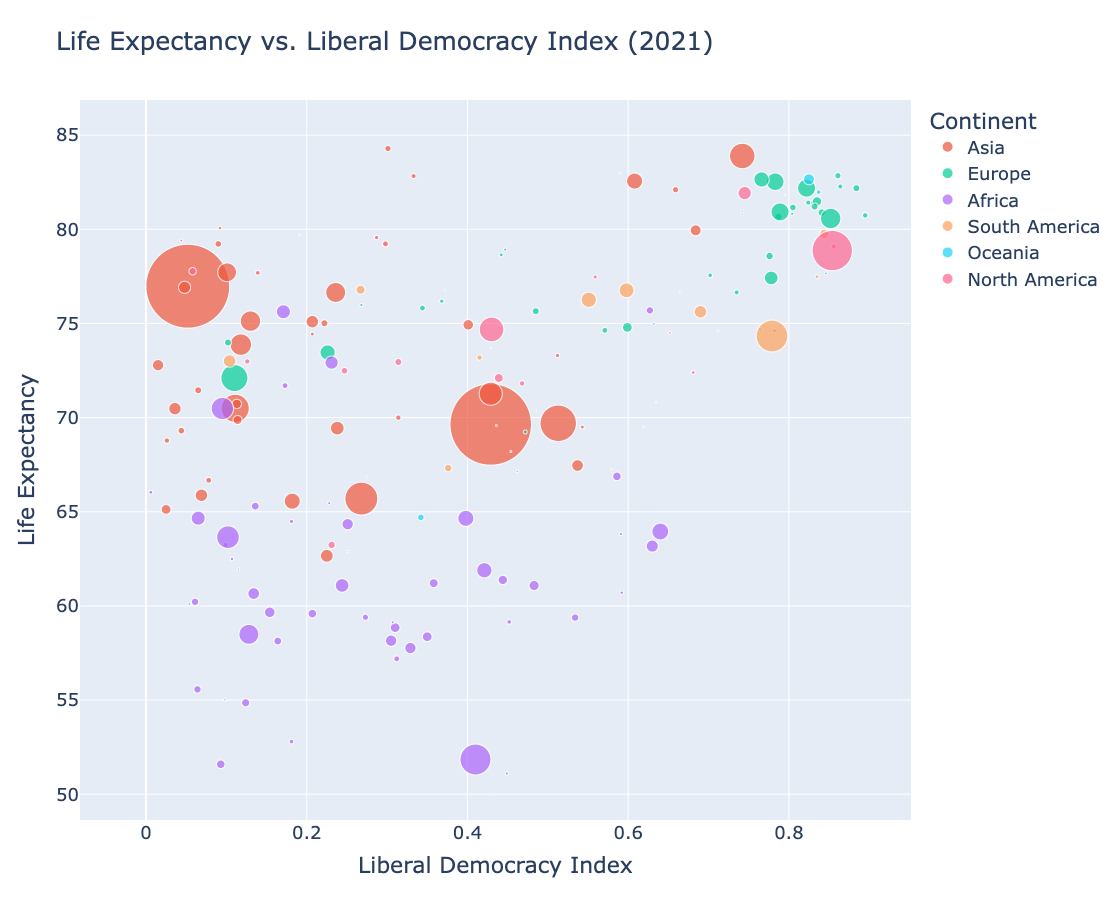

In [34]:
# Clean the data by removing rows with NaN values in critical columns
df_cleaned = life_exp_lib_democ.dropna(subset=['Liberal democracy index (best estimate, aggregate: average)', 
                               'Period life expectancy at birth - Sex: all - Age: 0'])


# Scale the population to increase the size of the points 
df_cleaned['Scaled Population'] = df_cleaned['Population (historical)'] / 1e6

# Create the scatter plot
fig = px.scatter(
    df_cleaned,
    x='Liberal democracy index (best estimate, aggregate: average)',
    y='Period life expectancy at birth - Sex: all - Age: 0',
    size='Scaled Population',  # Use the scaled population
    color='Continent',
    hover_name='Entity',
    size_max=200,  # Increase size_max to make points larger -- 200 worked the best
    title='Life Expectancy vs. Liberal Democracy Index (2021)',
    labels={
        'Liberal democracy index (best estimate, aggregate: average)': 'Liberal Democracy Index',
        'Period life expectancy at birth - Sex: all - Age: 0': 'Life Expectancy'
    }
)

# Update the layout
fig.update_layout(
    xaxis_title='Liberal Democracy Index',
    yaxis_title='Life Expectancy',
    legend_title='Continent',
    template='plotly',
    height=900,
    width=1000,
    font=dict(size=18) 
)

# Show the plot
fig.show()


/var/folders/3q/vbln2bmj5z3b21k7dy3d_zr40000gn/T/ipykernel_15406/1880562926.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3q/vbln2bmj5z3b21k7dy3d_zr40000gn/T/ipykernel_15406/1880562926.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



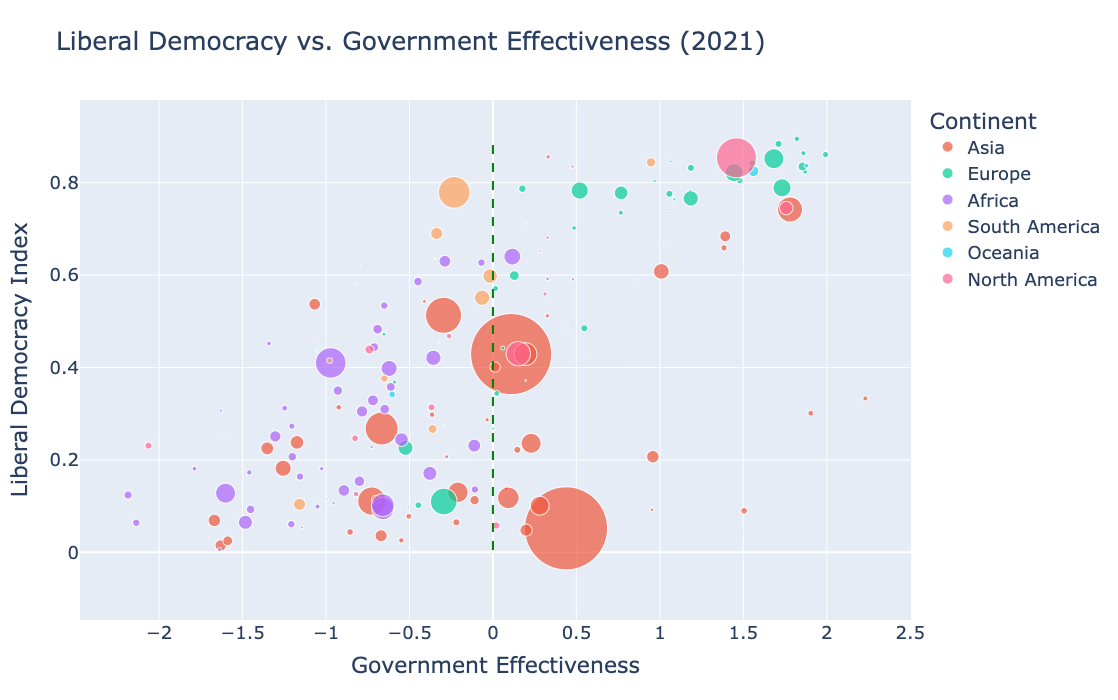

In [33]:
# loading the dataset
gov_efec_lib_dem = pd.read_csv("data/govt-effectiveness-vs-liberal-democracy.csv")

# Clean the data by removing rows with NaN values in critical columns
df_cleaned_gov = gov_efec_lib_dem.dropna(subset=['Liberal democracy index (best estimate, aggregate: average)'
                               ])

# You can try different scaling factors to get the desired effect
df_cleaned_gov['Scaled Population'] = df_cleaned_gov['Population (historical)'] / 1e6

# Drop rows where Scaled Population is NaN
df_cleaned_gov.dropna(subset=['Scaled Population'], inplace=True)



# Create the scatter plot
fig = px.scatter(
    df_cleaned_gov,
    x='Government effectiveness',
    y='Liberal democracy index (best estimate, aggregate: average)',
    size='Scaled Population',  # Use the scaled population
    color='Continent',
    hover_name='Entity',
    size_max=200,  # Increase size_max to make points larger -- 200 worked best
    title='Liberal Democracy vs. Government Effectiveness (2021)',
    labels={
        'Government effectiveness': 'Government Effectiveness',
        'Liberal democracy index (best estimate, aggregate: average)': 'Liberal Democracy Index'
    }
)

# Update the layout to add a vertical line at Government effectiveness of 0
fig.update_layout(
    xaxis_title='Government Effectiveness',
    yaxis_title='Liberal Democracy Index',
    legend_title='Continent',
    template='plotly',
    height=700,
    width=1100,
    shapes=[
        dict(
            type='line',
            x0=0,
            x1=0,
            y0=df_cleaned_gov['Liberal democracy index (best estimate, aggregate: average)'].min(),
            y1=df_cleaned_gov['Liberal democracy index (best estimate, aggregate: average)'].max(),
            line=dict(color='green', dash='dash')
        )
    ],
    font=dict(size=18)  # Increase the overall font size
)

# Show the plot
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62586 entries, 0 to 62585
Data columns (total 7 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Entity                                                       62586 non-null  object 
 1   Code                                                         57190 non-null  object 
 2   Year                                                         62586 non-null  int64  
 3   Period life expectancy at birth - Sex: all - Age: 0          20755 non-null  float64
 4   Liberal democracy index (best estimate, aggregate: average)  31459 non-null  float64
 5   Population (historical)                                      59177 non-null  float64
 6   Continent                                                    285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.3+ MB
None
        Entity 

/var/folders/3q/vbln2bmj5z3b21k7dy3d_zr40000gn/T/ipykernel_15406/3766690001.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



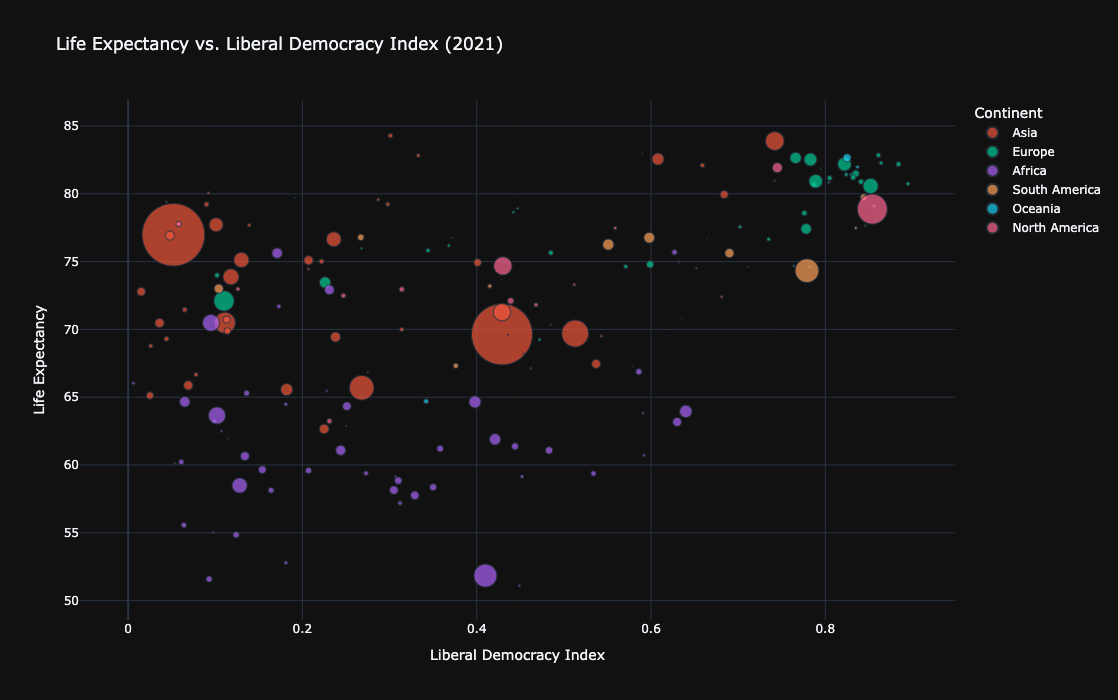

In [28]:
# Load the dataset
df = life_exp_lib_democ

# Display basic info and first few rows to understand the data structure
print(df.info())
print(df.head())

# Clean the data by removing rows with NaN values in critical columns
df_cleaned = df.dropna(subset=['Liberal democracy index (best estimate, aggregate: average)', 
                               'Period life expectancy at birth - Sex: all - Age: 0', 
                               'Population (historical)'])

# Scale the population to increase the size of the points
df_cleaned['Scaled Population'] = df_cleaned['Population (historical)'] / 1e6

# Create the scatter plot with text labels
fig = px.scatter(
    df_cleaned,
    x='Liberal democracy index (best estimate, aggregate: average)',
    y='Period life expectancy at birth - Sex: all - Age: 0',
    size='Scaled Population',  # Use the scaled population
    color='Continent',
    hover_name='Entity',
    # text='Entity',  # Add country names as text
    size_max=150,  # Increase size_max to make points larger
    title='Life Expectancy vs. Liberal Democracy Index (2021)',
    labels={
        'Liberal democracy index (best estimate, aggregate: average)': 'Liberal Democracy Index',
        'Period life expectancy at birth - Sex: all - Age: 0': 'Life Expectancy'
    }
)

# Update the layout
fig.update_layout(
    xaxis_title='Liberal Democracy Index',
    yaxis_title='Life Expectancy',
    legend_title='Continent',
    template='plotly_dark',
    height=700,
    width=900
)

# Update the text position for better readability
fig.update_traces(textposition='bottom center')

# Show the plot
fig.show()


In [10]:

# reading the data for Military expenditure as a share of GDP, 1827 to 2016
military_expenditure_gdp = pd.read_csv('data/military-expenditure-as-a-share-of-gdp-long.csv')


# Now, cleaning the DataFrame
military_expenditure_gdp_clean = military_expenditure_gdp.copy()

# Check for missing values
missing_values = military_expenditure_gdp_clean.isnull().sum()

# Drop columns with too many missing values if needed
# military_expenditure_gdp_clean = military_expenditure_gdp_clean.drop(columns=['Continent'])  

# Filling missing values where appropriate
military_expenditure_gdp_clean['Code'] = military_expenditure_gdp_clean['Code'].fillna('Unknown')

# Now, let's ensure we're using .loc properly to avoid the SettingWithCopyWarning
military_expenditure_gdp_clean.loc[:, 'Year'] = military_expenditure_gdp_clean['Year'].astype(int)

military_expenditure_gdp_clean.head()


,Entity,Code,Year,"Military expenditure as a share of GDP (OWID calculated based on NMC, COW & SIPRI (2017))"
0,Afghanistan,AFG,1956,1.737877
1,Afghanistan,AFG,1957,2.540325
2,Afghanistan,AFG,1958,2.127935
3,Afghanistan,AFG,1959,3.665864
4,Afghanistan,AFG,1960,2.640859


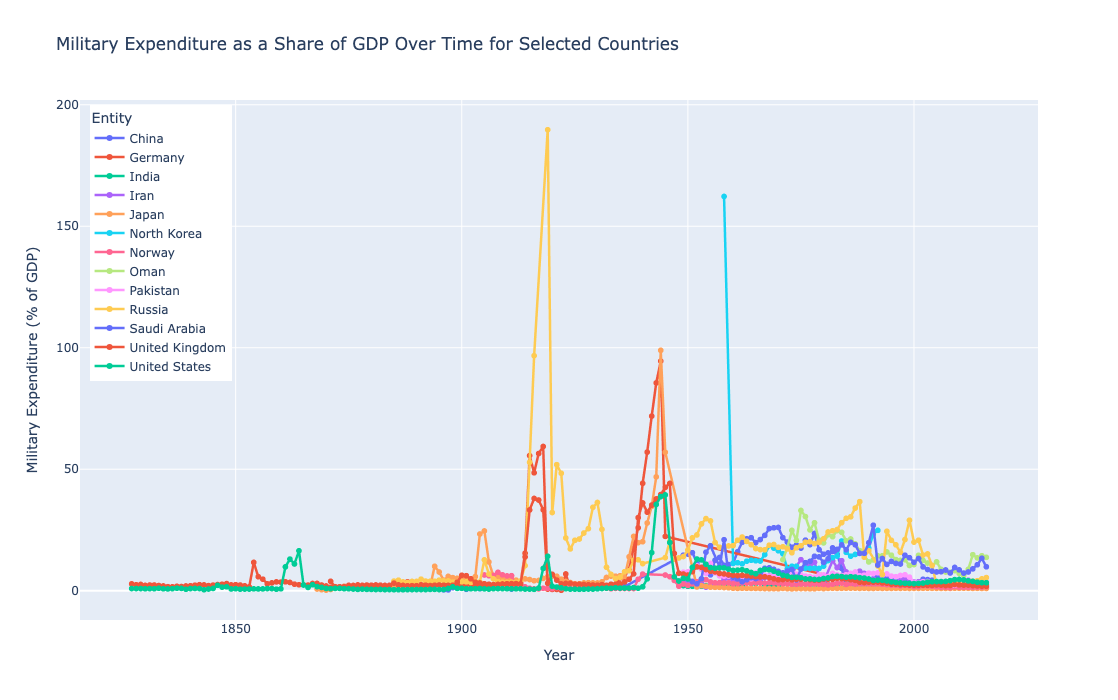

In [19]:
# Create the figure
fig = go.Figure()

# Filter the DataFrame for selected countries
selected_countries = ['India', 'United States', 'China', 'Germany', 'Russia', 'United Kingdom', 'North Korea', 'Saudi Arabia', 'Pakistan', 'Norway', 'Oman', 'Japan', 'Iran']
df_filtered = military_expenditure_gdp_clean[military_expenditure_gdp_clean['Entity'].isin(selected_countries)]

# Create the plot
fig = px.line(df_filtered, x='Year', y='Military expenditure as a share of GDP (OWID calculated based on NMC, COW & SIPRI (2017))',
              color='Entity',
              title='Military Expenditure as a Share of GDP Over Time for Selected Countries',
              labels={'Military expenditure as a share of GDP (OWID calculated based on NMC, COW & SIPRI (2017))': 'Military Expenditure (% of GDP)'},
              line_group='Entity',
              height=700)

# Update layout for better readability
fig.update_layout(
    hovermode='x unified',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    template="plotly"
)

# Update traces to increase line width
fig.update_traces(line=dict(width=2.5))  # Increase the width to 3, adjust as necessary
fig.update_traces(mode="markers+lines", hovertemplate=None)

fig.show()

In [12]:
# correlation of Military expenditure vs Liberal democracy index
military_expenditure_gdp_clean.head()

,Entity,Code,Year,"Military expenditure as a share of GDP (OWID calculated based on NMC, COW & SIPRI (2017))"
0,Afghanistan,AFG,1956,1.737877
1,Afghanistan,AFG,1957,2.540325
2,Afghanistan,AFG,1958,2.127935
3,Afghanistan,AFG,1959,3.665864
4,Afghanistan,AFG,1960,2.640859


In [13]:
# Look at the liberal democracy data frame
df = life_exp_lib_democ


# Clean the data by removing rows with NaN values in critical columns
df_cleaned = df.dropna(subset=['Liberal democracy index (best estimate, aggregate: average)', 
                               'Period life expectancy at birth - Sex: all - Age: 0', 
                               'Population (historical)'])

# Scale the population to increase the size of the points
df_cleaned['Scaled Population'] = df_cleaned['Population (historical)'] / 1e6

# drop the unnecessary columns
df_cleaned = df_cleaned.drop(['Period life expectancy at birth - Sex: all - Age: 0',
                                'Code',
                                'Scaled Population',
                                'Continent',
                                'Population (historical)'], axis=1)

# filter the data to take only for the year 2017
df_cleaned_2017 = df_cleaned[df_cleaned['Year'] == 2016]

df_cleaned_2017.head()

/var/folders/3q/vbln2bmj5z3b21k7dy3d_zr40000gn/T/ipykernel_15406/3219973010.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Entity,Year,"Liberal democracy index (best estimate, aggregate: average)"
67,Afghanistan,2016,0.208000
340,Africa,2016,0.297286
692,Albania,2016,0.443000
956,Algeria,2016,0.163000
1744,Angola,2016,0.134000


In [14]:
# Assuming military_expenditure_gdp_clean is your DataFrame
filtered_df = military_expenditure_gdp_clean[military_expenditure_gdp_clean['Year'] == 2016]

# Display the filtered DataFrame
filtered_df

,Entity,Code,Year,"Military expenditure as a share of GDP (OWID calculated based on NMC, COW & SIPRI (2017))"
42,Afghanistan,AFG,2016,0.892336
110,Albania,ALB,2016,1.229624
165,Algeria,DZA,2016,6.546702
222,Angola,AGO,2016,2.948674
374,Argentina,ARG,2016,0.954768
...,...,...,...,...
11177,Uruguay,URY,2016,1.854261
11335,Vietnam,VNM,2016,2.442961
11428,World,OWID_WRL,2016,2.224595
11504,Zambia,ZMB,2016,1.531921


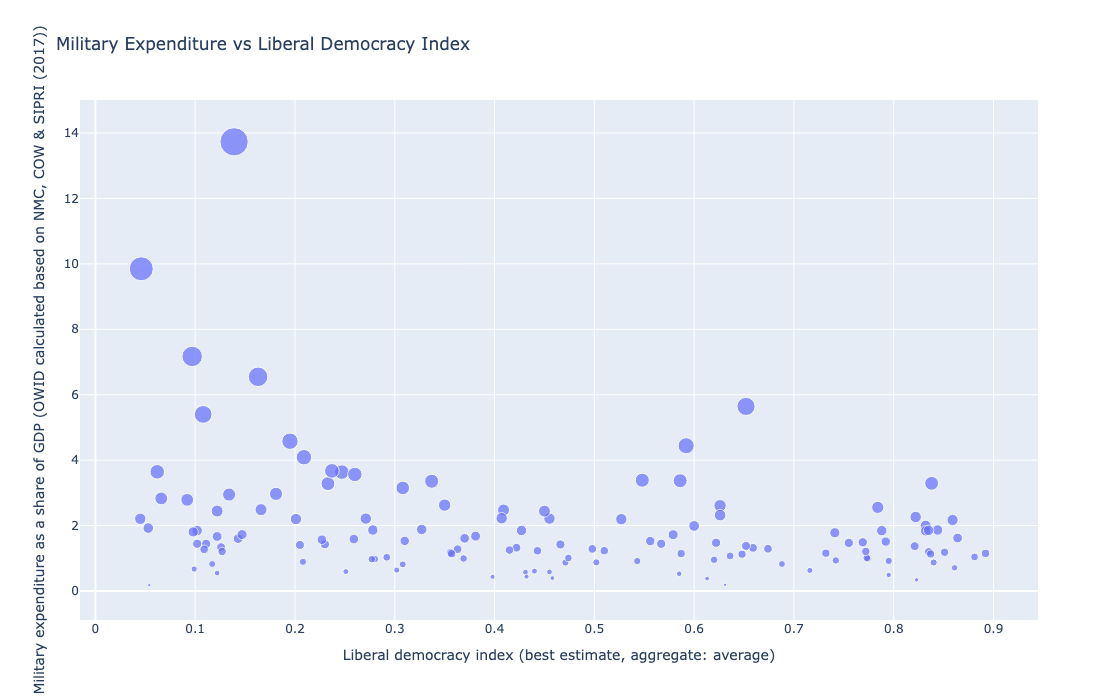

In [23]:
# Assuming df_cleaned and military_expenditure_gdp_clean are your dataframes
# Merge the dataframes on 'Entity' and 'Year'

# Merge the filtered dataframes
merged_df_2016 = pd.merge(df_cleaned_2017, filtered_df, on=['Entity', 'Year'])


# Plotting
# Create a scatter plot using Plotly
fig = px.scatter(
    merged_df_2016,
    y='Military expenditure as a share of GDP (OWID calculated based on NMC, COW & SIPRI (2017))',
    x='Liberal democracy index (best estimate, aggregate: average)',
    hover_name='Entity',  # Display country names on hover
    title='Military Expenditure vs Liberal Democracy Index',
    size='Military expenditure as a share of GDP (OWID calculated based on NMC, COW & SIPRI (2017))',
    height=700,
    labels={
        'x': 'Military Expenditure as a share of GDP',
        'y': 'Liberal Democracy Index'
    },
    template='plotly'
)

# Update the text position for better readability
fig.update_traces(textposition='bottom center')

fig.show()

In [16]:
# check the column types
df_cleaned_2017.describe()

,Year,"Liberal democracy index (best estimate, aggregate: average)"
count,180.0,180.000000
mean,2016.0,0.413082
std,0.0,0.265153
min,2016.0,0.006000
25%,2016.0,0.170500
50%,2016.0,0.389500
75%,2016.0,0.632250
max,2016.0,0.892000


In [35]:
merged_df_2016

,Entity,Year,"Liberal democracy index (best estimate, aggregate: average)",Code,"Military expenditure as a share of GDP (OWID calculated based on NMC, COW & SIPRI (2017))"
0,Afghanistan,2016,0.208000,AFG,0.892336
1,Albania,2016,0.443000,ALB,1.229624
2,Algeria,2016,0.163000,DZA,6.546702
3,Angola,2016,0.134000,AGO,2.948674
4,Argentina,2016,0.620000,ARG,0.954768
...,...,...,...,...,...
130,Uruguay,2016,0.835000,URY,1.854261
131,Vietnam,2016,0.122000,VNM,2.442961
132,World,2016,0.407123,OWID_WRL,2.224595
133,Zambia,2016,0.310000,ZMB,1.531921
